In [8]:
import sys, os, importlib, math, multiprocessing, json, requests
import rasterio, geojson

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from h3 import h3
from tqdm import tqdm

import GOSTRocks.rasterMisc as rMisc
from GOSTRocks.misc import tPrint

sys.path.append("../src")
import h3_helper
import country_zonal

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# ("Afghanistan", "Congo, Dem. Rep.", "Haiti", "Kenya", "Somalia", "South Sudan", "Yemen, Rep.")
test_countries = ['AFG','COD','HTI','KEN','SOM','SSD','YEM']
geoboundaries_url = 'https://www.geoboundaries.org/api/current/gbOpen/{iso3}/ALL/'

In [50]:
adm_level = 'ADM2'
small_size = 36
medium_size = 250
for country in test_countries:
    cur_url = geoboundaries_url.format(iso3=country)
    records = requests.get(cur_url).json()
    for r in records:
        if r["boundaryType"] == adm_level:
            cur_shapes = gpd.read_file(r['gjDownloadURL'])
            cur_shapes = cur_shapes.to_crs("ESRI:54009")
            cur_shapes['area'] = cur_shapes['geometry'].apply(lambda x: x.area/1000000)
            n_small = cur_shapes.loc[cur_shapes['area'] < small_size].shape[0]
            n_medium = cur_shapes.loc[cur_shapes['area'] < medium_size].shape[0] - n_small
            n_large = cur_shapes.shape[0] - n_medium - n_small
            print(f'{country}: total units {cur_shapes.shape[0]}, small units {n_small}, medium_units {n_medium}')

AFG: total units 398, small units 2, medium_units 51
COD: total units 189, small units 17, medium_units 17
HTI: total units 42, small units 0, medium_units 7
KEN: total units 290, small units 16, medium_units 64
SOM: total units 118, small units 14, medium_units 3
SSD: total units 78, small units 0, medium_units 0
YEM: total units 335, small units 25, medium_units 91


In [36]:
cur_shapes

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,area
0,Sinoko,,90231094B63262338872627,KEN,ADM3,"POLYGON ((3518929.033 109177.912, 3518774.759 ...",53.430246
1,Kiomo/Kyethani,,90231094B31178888028499,KEN,ADM3,"POLYGON ((3811883.479 -115479.033, 3811690.685...",378.165732
2,Nyalenda 'A',,90231094B66007306054522,KEN,ADM3,"POLYGON ((3481612.435 -18386.268, 3481958.193 ...",5.035454
3,Saboti,,90231094B63033387394767,KEN,ADM3,"POLYGON ((3496050.898 117333.583, 3495100.098 ...",107.490456
4,South Maragoli,,90231094B45796893208843,KEN,ADM3,"POLYGON ((3475849.218 -1820.290, 3476389.796 -...",28.224849
...,...,...,...,...,...,...,...
1447,Ilchamus,,90231094B23685280229400,KEN,ADM3,"POLYGON ((3615342.125 53524.899, 3615885.735 5...",255.223800
1448,Salama,,90231094B51515570611930,KEN,ADM3,"POLYGON ((3671986.975 1711.031, 3671661.227 41...",1021.422085
1449,Ngobit,,90231094B67563447074206,KEN,ADM3,"POLYGON ((3691295.851 -12882.920, 3691057.945 ...",596.158164
1450,Tigithi,,90231094B80704318773614,KEN,ADM3,"POLYGON ((3707312.411 136.121, 3706468.940 -18...",681.411153


array([[<AxesSubplot:title={'center':'area'}>]], dtype=object)

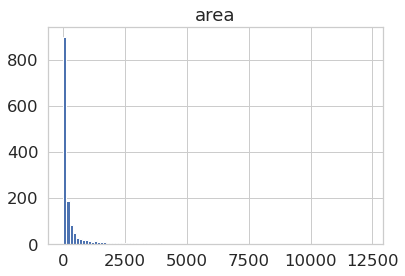

In [44]:
cur_shapes.hist('area', bins=100)